<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/use_Unet_and_class_weighting_more_data_CNN_pixel_segmentation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN for Pixel segmentation**

In [26]:
# %rm -rf '/content/data'

In [ ]:
# !pip install -r requirements.txt

In [1]:
! pip install -q git+https://github.com/tensorflow/examples.git --quiet

  Preparing metadata (setup.py) ... done


In [2]:
# Importing Libraries
import zipfile
import os
from PIL import Image
import numpy as np
from skimage import img_as_ubyte
from scipy.spatial.distance import cdist
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Softmax
import matplotlib.pyplot as plt

# Unzipping and Defining Directories

*   train image
      * image1
      * image2 ...
*   train mask image
      * mask1
      * mask2 ...
*   test image
      * test_image
*   test mask image
      * test_mask


In [3]:
# Unzipping and Defining Directories
zip_path = '/content/data.zip'
unzip_dir = '/content'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
data_dir = os.path.join(unzip_dir, 'data')
# train_dir = os.path.join(data_dir, 'train')
# masks_dir = os.path.join(data_dir, 'masks')
# test_dir = os.path.join(data_dir, 'test')
# test_masks_dir = os.path.join(data_dir, 'test_mask')

# Mapping of RGB Colors to Class Labels and Conversion Function

In [4]:
# Mapping of RGB colors to class labels
class_colors = np.array([
    [0, 0, 0],    # Black
    [255, 0, 0],  # Red
    [0, 255, 0],  # Green
    [0, 0, 255]   # Blue
])

# Function to convert mask image to class labels
def convert_mask_to_labels(mask_image):
    display(mask_image.shape)
    mask_labels = np.zeros(mask_image.shape[:2], dtype=np.uint8)
    mask_image = mask_image[:, :, :3]
    for i in range(mask_image.shape[0]):
        for j in range(mask_image.shape[1]):
            distances = cdist([mask_image[i, j]], class_colors, 'euclidean')
            class_label = np.argmin(distances)
            mask_labels[i, j] = class_label  ## the output example class_label 0 class_label 0 class_label 0
    return mask_labels

# Loading Images and Masks

In [5]:
# Loading images and masks
def load_images_and_masks(image_dir, mask_dir, is_test=False):
    images = []
    masks = []
    for image_name in tqdm(os.listdir(image_dir)):
      print(image_name)
      image_path = os.path.join(image_dir, image_name)
      if image_path != '/content/data/train/.ipynb_checkpoints' and  image_path != '/content/data/test/.ipynb_checkpoints':
        mask_name = "test_mask.JPG" if is_test else "mask" + image_name[5:]
        mask_path = os.path.join(mask_dir, mask_name)

        # Load image and mask
        image = Image.open(image_path)
        mask_image = Image.open(mask_path)

        # Convert mask image to class labels
        mask_labels = convert_mask_to_labels(np.array(mask_image))
        images.append(img_as_ubyte(image))
        masks.append(mask_labels)

    return np.array(images), np.array(masks)

train_dir = "/content/data/train"
masks_dir = "/content/data/masks"
test_dir = "/content/data/test"
test_masks_dir = "/content/data/test_mask"


# Loading Training and Test Datasets

In [6]:
qwe = np.array(Image.open("/content/data/masks/mask1.JPG"))
qwe.shape

(990, 1060, 4)

In [7]:
qwe = np.array(Image.open("/content/data/masks/mask1.JPG"))
qwe.shape

(990, 1060, 4)

In [8]:
# Loading training and test datasets
train_images, train_masks = load_images_and_masks(train_dir, masks_dir)
test_images, test_masks = load_images_and_masks(test_dir, test_masks_dir, is_test=True)

  0%|          | 0/10 [00:00<?, ?it/s]

image4.JPG


(990, 1060, 4)

 10%|█         | 1/10 [00:11<01:40, 11.16s/it]

image3.JPG


(990, 1060, 4)

 20%|██        | 2/10 [00:22<01:29, 11.16s/it]

image9.JPG


(990, 1060, 4)

 30%|███       | 3/10 [00:34<01:22, 11.84s/it]

image6.JPG


(990, 1060, 4)

 40%|████      | 4/10 [00:46<01:09, 11.53s/it]

image7.JPG


(990, 1060, 4)

 50%|█████     | 5/10 [00:57<00:57, 11.54s/it]

image5.JPG


(990, 1060, 4)

 60%|██████    | 6/10 [01:08<00:44, 11.17s/it]

image8.JPG


(990, 1060, 4)

 70%|███████   | 7/10 [01:18<00:32, 10.92s/it]

image1.JPG


(990, 1060, 4)

 80%|████████  | 8/10 [01:29<00:21, 10.98s/it]

image2.JPG


(990, 1060, 4)

 90%|█████████ | 9/10 [01:40<00:11, 11.02s/it]

image10.JPG


(990, 1060, 4)

  0%|          | 0/1 [00:00<?, ?it/s]

test_image.JPG


(990, 1060, 4)

100%|██████████| 1/1 [00:11<00:00, 11.04s/it]


In [9]:
add_colors = lambda x: class_colors[x].astype(dtype=np.uint8)

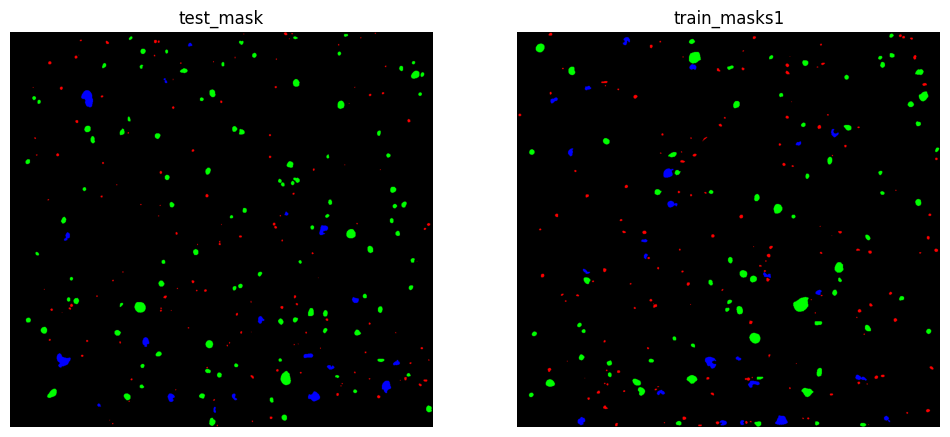

In [10]:
# Plotting Original and Predicted Images
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].imshow(add_colors(test_masks[0]))
ax[0].set_title("test_mask")
ax[0].axis('off')

ax[1].imshow(add_colors(train_masks[0]))
ax[1].set_title("train_masks1")
ax[1].axis('off')
# ax[2].imshow(train_masks[1])
# ax[2].set_title("train_masks2")
# ax[2].axis('off')
plt.show()

# Building the CNN Model

# Reshaping Masks for Training and Training the Model

In [11]:
def normalize(x):
    # Please note that there is the similar function in Sklearn also
    return (x-np.min(x))/(np.max(x)-np.min(x))

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/35
10/10 [==============================] - 7s 174ms/step - loss: 0.0148 - accuracy: 0.0436
Epoch 2/35
10/10 [==============================] - 2s 155ms/step - loss: 0.0099 - accuracy: 0.0191
Epoch 3/35
10/10 [==============================] - 1s 150ms/step - loss: 0.0093 - accuracy: 0.0249
Epoch 4/35
10/10 [==============================] - 2s 158ms/step - loss: 0.0083 - accuracy: 0.1438
Epoch 5/35
10/10 [==============================] - 1s 147ms/step - loss: 0.0078 - accuracy: 0.2601
Epoch 6/35
10/10 [==============================] - 2s 157ms/step - loss: 0.0073 - accuracy: 0.2404
Epoch 7/35
10/10 [==============================] - 2s 188ms/step - loss: 0.0066 - accuracy: 0.2787
Epoch 8/35
10/10 [==============================] - 2s 243ms/step - loss: 0.0064 - accuracy: 0.3481
Epoch 9/35
10/10 [==============================] - 1s 149ms/step - loss: 0.0058 - accuracy: 0.3785
Epoch 10/35
10/10 [==================

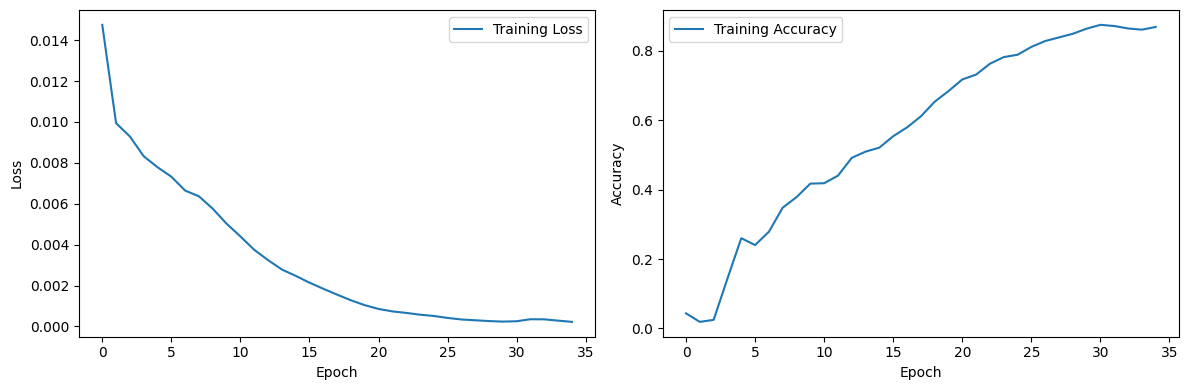

1/1 [==============================] - 1s 1s/step
Accuracy for Class 0: 90.77%
Accuracy for Class 1: 99.30%
Accuracy for Class 2: 100.00%
Accuracy for Class 3: 100.00%


In [12]:
import numpy as np
import cv2
from tensorflow.keras.layers import Activation, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow_examples.models.pix2pix import pix2pix



# Updated function to build the CNN model
def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(4, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        Conv2D(num_classes, (3, 3), padding='same'),
        # Activation(pixelwise_softmax)  # Applying custom softmax activation
        Activation('softmax')
    ])

    return model

'''======================================================================================================'''
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

'''======================================================================================================'''
# #####  train_images, train_masks
image_size = (128, 128)
num_classes = 4
# Define input shape and number of classes
# input_shape = (1024, 1024, 3)
input_shape = image_size + (3,)


# Build and compile the corrected model
simple_cnn_model = unet_model(num_classes)
# simple_cnn_model = build_simple_cnn(input_shape, num_classes)


# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,ignore_class=None, name='sparse_categorical_crossentropy')
simple_cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])


def compute_sample_weights(image, mask):
#  0.97882080078125,
#  0.00274658203125,
#  0.0137939453125,
#  0.004638671875
  ''' Compute sample weights for the image given class. '''
  # Compute relative weight of class
  class_weights = tf.constant([0.001, 0.5, 1.0, 3.0])
  class_weights = class_weights/tf.reduce_sum(class_weights)
  # Compute same-shaped Tensor as mask with sample weights per
  # mask element.
  sample_weights = tf.gather(class_weights,indices=tf.cast(mask, tf.int32))

  return  sample_weights

# Resize the data to match the input dimensions of the model
desired_shape = (image_size[1],image_size[0]) # Adjust the shape for resizing
resized_train_images = np.array([cv2.resize(img, desired_shape) for img in train_images])
resized_train_masks = np.array([cv2.resize(mask, desired_shape) for mask in train_masks])

weighted_samples = [ compute_sample_weights(train_images[i],mask) for i,mask in enumerate(resized_train_masks)]
weighted_samples = tf.stack(weighted_samples)


# Training the Model
nbr_train_exp = 10
history = simple_cnn_model.fit(resized_train_images[:nbr_train_exp], resized_train_masks[:nbr_train_exp], sample_weight=weighted_samples[:nbr_train_exp], epochs=35, batch_size=1 )
# history = simple_cnn_model.fit(train_batches, epochs=15, batch_size=2 )

# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_train_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_train_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

In [13]:
simple_cnn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

# Predicting on Train Data

1/1 [==============================] - 0s 446ms/step
train_predictions (10, 128, 128, 4)
Train Accuracy: 89.51%, IoU: 10.89%
1/1 [==============================] - 0s 454ms/step
Accuracy for Class 0: 90.11%
Accuracy for Class 1: 13.80%
Accuracy for Class 2: 62.96%
Accuracy for Class 3: 75.82%


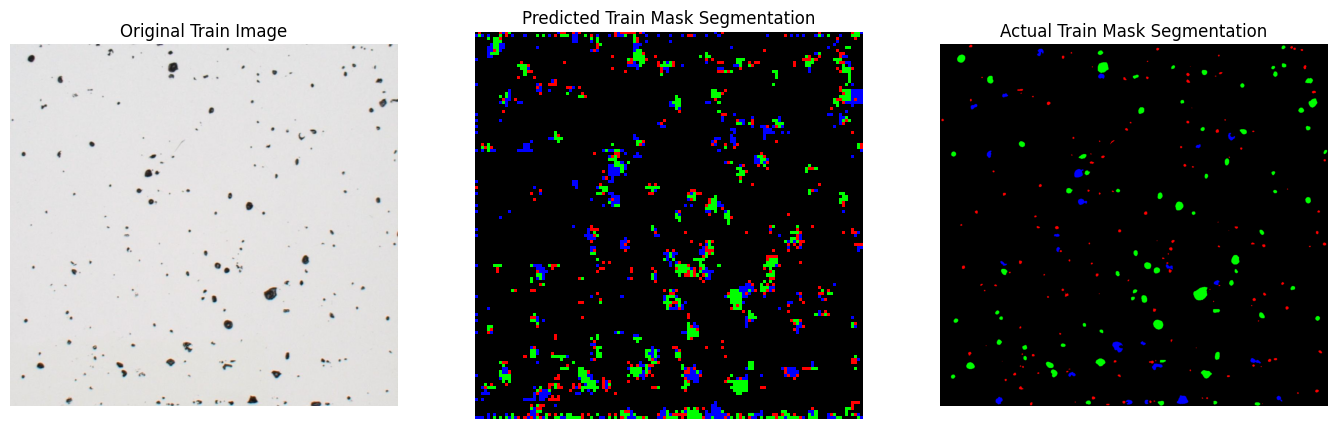

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

### train_images, train_masks
# desired_shape = (1060, 992)  # Adjust the shape for resizing
desired_shape = (image_size[1],image_size[0])
resized_train_images = np.array([cv2.resize(img, desired_shape) for img in train_images])

# Predict on the resized train images
train_predictions = simple_cnn_model.predict(resized_train_images)
print('train_predictions', train_predictions.shape)
# # Get the class with the highest probability for each pixel
train_predictions = np.argmax(train_predictions, axis=-1)

# # Reshape predictions to match original image shape
train_predictions = train_predictions.reshape(resized_train_images.shape[0], *resized_train_images.shape[1:3])

# # Resizing the train masks to match the predictions
resized_train_masks = np.array([cv2.resize(mask, desired_shape, interpolation=cv2.INTER_NEAREST) for mask in train_masks])

# # Flattening the predictions and the true masks
flat_predictions = train_predictions.flatten()
flat_true_masks = resized_train_masks.flatten()

# # Calculating the accuracy
accuracy = np.sum(flat_predictions == flat_true_masks) / flat_predictions.size

# # Calculating the intersec over union
m_iou = metrics.IoU(num_classes=4, target_class_ids=[1, 2, 3])
m_iou.update_state(y_true=resized_train_masks, y_pred=train_predictions)
iou = m_iou.result().numpy()

print(f"Train Accuracy: {accuracy * 100:.2f}%, IoU: {iou*100:.2f}%")

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_train_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_train_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

# Plotting Original and Predicted Images
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
ax[0].imshow(train_images[0])
ax[0].set_title("Original Train Image")
ax[0].axis('off')

ax[1].imshow(add_colors(train_predictions[0]))
ax[1].set_title("Predicted Train Mask Segmentation")
ax[1].axis('off')

ax[2].imshow(add_colors(train_masks[0]))
ax[2].set_title("Actual Train Mask Segmentation")
ax[2].axis('off')
plt.show()




In [15]:
uniques, counts = np.unique(resized_test_masks, return_counts=True)
unique_count = {unique:count for unique, count in zip(uniques, counts)}
print('pixel count & % in each class::')
display(unique_count)

unique_count_percent = {unique:count/resized_test_masks.reshape(-1).shape[0] for unique, count in zip(uniques, counts)}
display(unique_count_percent)


NameError: ignored

# Predicting on Test Data

1/1 [==============================] - 0s 76ms/step
Test Accuracy: 87.54%, IoU: 0.04%
1/1 [==============================] - 0s 75ms/step
Accuracy for Class 0: 88.64%
Accuracy for Class 1: 2.78%
Accuracy for Class 2: 29.09%
Accuracy for Class 3: 64.00%


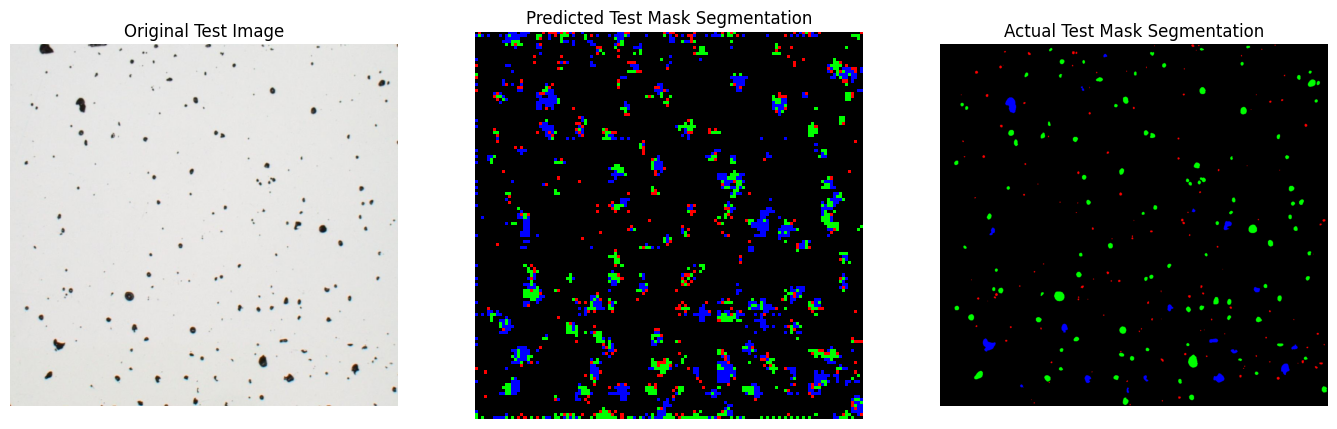

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

### test_images, test_masks
# Resize the test images to match the input dimensions of the model
# desired_shape = (1060, 992)  # Adjust the shape for resizing
desired_shape = (image_size[1],image_size[0])
resized_test_images = np.array([cv2.resize(img, desired_shape) for img in test_images])

# Predict on the resized test images
test_predictions = simple_cnn_model.predict(resized_test_images)

# # Get the class with the highest probability for each pixel
test_predictions = np.argmax(test_predictions, axis=-1)

# # Reshape predictions to match original image shape
test_predictions = test_predictions.reshape(resized_test_images.shape[0], *resized_test_images.shape[1:3])

# # Resizing the test masks to match the predictions
resized_test_masks = np.array([cv2.resize(mask, desired_shape, interpolation=cv2.INTER_NEAREST) for mask in test_masks])

# # Flattening the predictions and the true masks
flat_predictions = test_predictions.flatten()
flat_true_masks = resized_test_masks.flatten()

# # Calculating the accuracy
accuracy = np.sum(flat_predictions == flat_true_masks) / flat_predictions.size

# # Calculating the intersec over union
m_iou = metrics.IoU(num_classes=4, target_class_ids=[1, 2, 3])
m_iou.update_state(y_true=resized_test_masks, y_pred=test_predictions)
iou = m_iou.result().numpy()

print(f"Test Accuracy: {accuracy * 100:.2f}%, IoU: {iou:.2f}%")

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_test_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_test_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

# Plotting Original and Predicted Images
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
ax[0].imshow(test_images[0])
ax[0].set_title("Original Test Image")
ax[0].axis('off')

ax[1].imshow(add_colors(test_predictions[0]))
ax[1].set_title("Predicted Test Mask Segmentation")
ax[1].axis('off')

ax[2].imshow(add_colors(test_masks[0]))
ax[2].set_title("Actual Test Mask Segmentation")
ax[2].axis('off')
plt.show()



In [17]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_masks_reshaped:", train_masks.shape)

# Print model summary
simple_cnn_model.summary()


Shape of train_images: (10, 990, 1060, 3)
Shape of train_masks_reshaped: (10, 990, 1060)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
   

# the following code to download the results and check the colors of the masks

In [ ]:
from google.colab import files
!zip -r /content/data.zip /content/data
files.download('/content/data.zip')


  adding: content/data/ (stored 0%)
  adding: content/data/train/ (stored 0%)
  adding: content/data/train/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/train/image1.JPG (deflated 1%)
  adding: content/data/test_mask/ (stored 0%)
  adding: content/data/test_mask/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/test_mask/test_mask.JPG (deflated 12%)
  adding: content/data/test/ (stored 0%)
  adding: content/data/test/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/test/test_image.JPG (deflated 4%)
  adding: content/data/masks/ (stored 0%)
  adding: content/data/masks/mask1.JPG (deflated 3%)
  adding: content/data/masks/.ipynb_checkpoints/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# img_temp = Image.open(image_path)
from PIL import Image
import numpy as np
import cv2
img_temp = Image.open('/content/data/masks/mask2.JPG')
np.unique(np.array(img_temp))

array([  0, 255], dtype=uint8)

In [ ]:
# image = cv2.imread(image_path)
image = cv2.imread(('/content/data/masks/mask2.JPG'))
np.unique(image)

array([  0, 255], dtype=uint8)

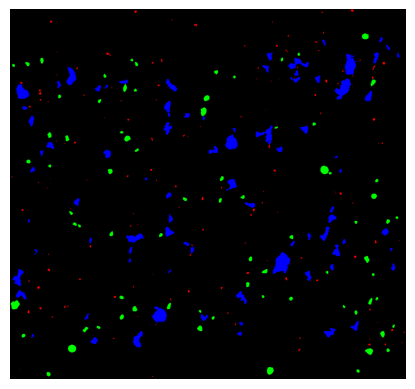

Image Information:
Height: 990
Width: 1060
Channels: 3
Pixel Values in ROI:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = '/content/data/masks/mask2.JPG'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Get image dimensions (height, width, number of channels)
    height, width, channels = image.shape

    print("Image Information:")
    print("Height:", height)
    print("Width:", width)
    print("Channels:", channels)

    # Choose a region of interest (ROI) within the image
    # Define the coordinates of the top-left and bottom-right corners of the ROI
    roi_top_left = (100, 100)  # Replace with your desired coordinates
    roi_bottom_right = (200, 200)

    # Extract the ROI from the image
    roi = image[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]

    # Print pixel values of the ROI
    print("Pixel Values in ROI:")
    for row in roi:
        print(row)